#### *This analysis will focus on understanding factors affecting car prices, visualizing relationships, and recommending the top 5 cars among the preferred options given by the user*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from datetime import datetime
current_datetime = datetime.now()
current_year = current_datetime.year

In [3]:
df = pd.read_csv('car_prediction_dataset.csv')

In [4]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


In [5]:
print("Total cars available in the original dataset are: ", df.shape[0])

Total cars available in the original dataset are:  8128


In [6]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'mileage(km/ltr/kg)', 'engine', 'max_power',
       'seats'],
      dtype='object')

In [7]:
most_cars = df['name'].value_counts().nlargest(3)
print("The top 3 cars with the highest availability are:\n", most_cars)

The top 3 cars with the highest availability are:
 name
Maruti Swift Dzire VDI    129
Maruti Alto 800 LXI        82
Maruti Alto LXi            71
Name: count, dtype: int64


In [8]:
# df.dropna(inplace=True)
df.isnull().sum()

name                    0
year                    0
selling_price           0
km_driven               0
fuel                    0
seller_type             0
transmission            0
owner                   0
mileage(km/ltr/kg)    221
engine                221
max_power             215
seats                 221
dtype: int64

In [9]:
df.fillna(value=5.0, inplace=True)

In [10]:
dups = int(df.duplicated().sum())
print(f"There are {dups} duplicates in your data.")

There are 1202 duplicates in your data.


In [11]:
max_price = df['selling_price'].max()

print("The most expensive car is: ")
df[df['selling_price'] == max_price]

The most expensive car is: 


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
170,Volvo XC90 T8 Excellence BSIV,2017,10000000,30000,Petrol,Individual,Automatic,First Owner,42.0,1969.0,400,4.0


### *plotting selling price vs year of all the cars*

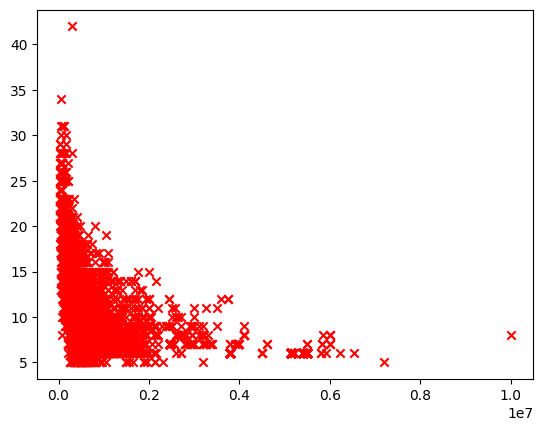

In [12]:
x = df['selling_price']
df['y'] = current_year - df['year']

plt.scatter(x,df['y'], marker='x', c='r')
# sns.scatterplot(x='selling_price',y='year', data=df, marker='x')
plt.show()

###### df[df['y'] > 40]

In [13]:
df.drop('y', axis=1, inplace=True)

### *Conditions given by the user*

In [14]:
# I want to buy a car which follows certain conditions:
# 1) The car is under the budget (<400000).
# 2) The car should be limited to a maximum of two owners.
# 3) Car has a minimum life of n years.


In [15]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


In [16]:
total_cars = df.shape[0]
total_cars

8128

In [31]:
# car_name, car_year, car_price, car_km, car_fuel, car_trans, car_owner, car_mileage, car_engine, car_power, car_seats

add_car = input("Do you want to add any car? Yes or No.\n").capitalize()
if add_car == 'Yes':
    cars_no = int(input("How many cars you want to add?\n"))
    for i in range(cars_no):
        car_name = input("Enter the car's name: ").capitalize()
        car_year = int(input("Enter the car's year of registration: "))
        car_price = int(input("Enter the car's price: "))
        car_km = int(input("Enter the distance covered by the car in km: "))
        car_fuel = input("Enter the fuel type: ").capitalize()
        car_trans = input("Enter the transmission type: ").capitalize()
        car_owner = input("Enter the subsequent owner: ").capitalize()
        car_mileage = float(input("Enter the mileage of your car: "))
        car_engine = float(input("Enter the CC of the engine: "))
        car_power = float(input("Enter the max power of your car: "))
        car_seats = int(input("Enter the seating capacity of your car: "))
        
        df.loc[total_cars] = [car_name, car_year, car_price, car_km, car_fuel, 'Individual', car_trans, car_owner, car_mileage, car_engine, car_power, car_seats]
        total_cars += 1
        df.tail()
# df.loc[8128] = 'hello'
total_cars


KeyboardInterrupt: Interrupted by user

In [18]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
8123,Hyundai i20 Magna,2013,320000,110000,Petrol,Individual,Manual,First Owner,18.50,1197.0,82.85,5.0
8124,Hyundai Verna CRDi SX,2007,135000,119000,Diesel,Individual,Manual,Fourth & Above Owner,16.80,1493.0,110,5.0
8125,Maruti Swift Dzire ZDi,2009,382000,120000,Diesel,Individual,Manual,First Owner,19.30,1248.0,73.9,5.0
8126,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0
8127,Tata Indigo CR4,2013,290000,25000,Diesel,Individual,Manual,First Owner,23.57,1396.0,70,5.0


## *REMOVING DUPLICATES*

In [19]:
df.drop_duplicates(inplace=True)
# shape2 = df.shape[0]
print(f"There were {dups} duplicates in your data which have been successfully removed.")

There were 1202 duplicates in your data which have been successfully removed.


### *Taking user input*

In [20]:
#user input

min_budget = int(input("Enter the min budget: "))
max_budget = int(input("Enter the max budget: "))

life = int(input("Enter the minimum life span required for the car: "))
fuel_type = input("Enter the fuel type, Diesel, Petrol or CNG: ")
transmission_type = input("Enter the transmission type: ")


Enter the min budget:  500000
Enter the max budget:  550000
Enter the minimum life span required for the car:  8
Enter the fuel type, Diesel, Petrol or CNG:  petrol
Enter the transmission type:  manual


### *Filtering budget*

In [21]:
#budget section

df1 = df[(df['selling_price'] > min_budget) & (df['selling_price'] < max_budget)].copy()


### *Evaluate Age of cars and filtering by life span*

In [22]:

life_span = []
for i in range(df1.shape[0]):
    n = current_year - df1.iloc[i, 1]
    life_span.append(int(n))

df1['Age'] = life_span 
df1 = df1[df1['Age'] <= life]


### *Filtering fuel type*

In [23]:
##### fuel section

fuel_type = fuel_type.capitalize()
df1 = df1[df1['fuel'] == fuel_type]



### *Transmission section*

In [24]:
transmission_type = transmission_type.capitalize()
df1 = df1[df1['transmission'] == transmission_type]

### *Displaying the available cars*

In [25]:
available = df1.shape[0]
if available == 0:
    print("There are no cars available.")
elif available == 1:
    print(f"There is only 1 car available which is -> {df1.iloc[0,0]}")
else: 
    print(f"There are {available} cars available:\n{df1.iloc[:,0]}")

 

There are 40 cars available:
198                    Tata Tigor 1.2 Revotron XZ
224                     Hyundai Xcent 1.2 VTVT SX
227                     Tata Zest Revotron 1.2 XT
676                  Mahindra KUV 100 G80 K6 Plus
827                        Maruti Swift Dzire VXI
1018                   Tata Tiago 1.2 Revotron XZ
1598                   Hyundai Xcent 1.2 Kappa SX
1739                     Hyundai Grand i10 Sportz
1761                     Hyundai Xcent 1.2 VTVT E
1981                     Hyundai Santro Asta BSIV
2164                        Maruti Swift VXI 2018
2200                      Maruti Baleno Delta 1.2
2553    Hyundai Grand i10 1.2 Kappa Sportz Option
2797    Hyundai Grand i10 1.2 Kappa Sportz Option
2930                             Maruti Swift LXI
3267                      Maruti Baleno Sigma 1.2
3307       Hyundai Grand i10 1.2 Kappa Magna BSIV
3900            Hyundai Xcent 1.2 Kappa SX Option
4039      Hyundai Grand i10 1.2 Kappa Sportz BSIV
4659                 

### *calculating price to mileage ratio*

In [26]:
ratio = (df1['selling_price']) / (df1['mileage(km/ltr/kg)'])

df1['price to mileage ratio'] = ratio.round(2)



df2 = df1.sort_values('price to mileage ratio').head(10).copy()

df2.reset_index()


The leading cars having the minimum Price:Mileage ratio and fewest km driven available within your preferred options are: 


,index,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Age,price to mileage ratio
0,6321,Hyundai Grand i10 1.2 Kappa Magna BSIV,2018,540000,4000,Petrol,Individual,Manual,First Owner,18.90,1197.0,81.86,5.0,7,28571.43
1,4659,Hyundai Santro Sportz BSIV,2019,509999,5000,Petrol,Individual,Manual,First Owner,20.30,1086.0,68,5.0,6,25123.10
2,5837,Tata Nexon 1.2 Revotron XM,2020,537000,5000,Petrol,Individual,Manual,First Owner,17.00,1198.0,108.5,5.0,5,31588.24
3,7128,Hyundai Grand i10 1.2 Kappa Sportz Option,2018,528000,5000,Petrol,Individual,Manual,First Owner,18.90,1197.0,81.86,5.0,7,27936.51
4,2797,Hyundai Grand i10 1.2 Kappa Sportz Option,2018,520000,6000,Petrol,Individual,Manual,First Owner,18.90,1197.0,81.86,5.0,7,27513.23
5,1981,Hyundai Santro Asta BSIV,2018,540000,7000,Petrol,Dealer,Manual,First Owner,20.30,1086.0,68,5.0,7,26600.99
6,7962,Ford Figo 1.2P Titanium MT,2019,530000,9500,Petrol,Individual,Manual,First Owner,18.16,1196.0,86.8,5.0,6,29185.02
7,3307,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,525000,10000,Petrol,Individual,Manual,First Owner,18.90,1197.0,81.86,5.0,8,27777.78
8,2930,Maruti Swift LXI,2019,509999,10000,Petrol,Individual,Manual,First Owner,21.21,1197.0,81.8,5.0,6,24045.21
9,5700,Maruti Ignis 1.2 Delta BSIV,2018,535000,12000,Petrol,Individual,Manual,First Owner,20.89,1197.0,81.8,5.0,7,25610.34


In [33]:
print("The leading cars having the minimum Price:Mileage ratio and fewest km driven available within your preferred options are: ")
df2 = df2.nsmallest(5, 'km_driven')
df2

The leading cars having the minimum Price:Mileage ratio and fewest km driven available within your preferred options are: 


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats,Age,price to mileage ratio
4659,Hyundai Santro Sportz BSIV,2019,509999,5000,Petrol,Individual,Manual,First Owner,20.30,1086.0,68,5.0,6,25123.10
2797,Hyundai Grand i10 1.2 Kappa Sportz Option,2018,520000,6000,Petrol,Individual,Manual,First Owner,18.90,1197.0,81.86,5.0,7,27513.23
1981,Hyundai Santro Asta BSIV,2018,540000,7000,Petrol,Dealer,Manual,First Owner,20.30,1086.0,68,5.0,7,26600.99
2930,Maruti Swift LXI,2019,509999,10000,Petrol,Individual,Manual,First Owner,21.21,1197.0,81.8,5.0,6,24045.21
5700,Maruti Ignis 1.2 Delta BSIV,2018,535000,12000,Petrol,Individual,Manual,First Owner,20.89,1197.0,81.8,5.0,7,25610.34


### *plotting selling price vs p-m ratio of the suggested top cars*

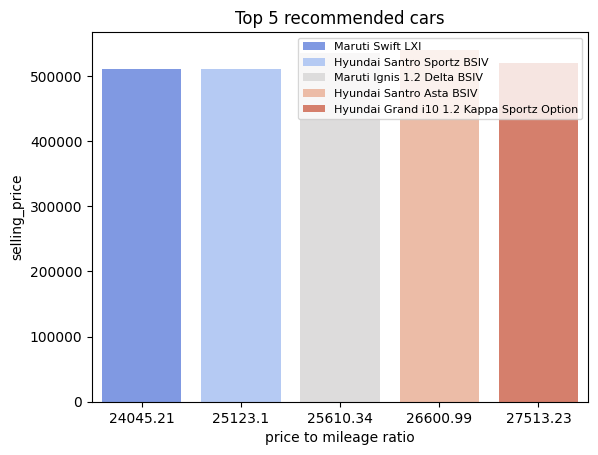

In [32]:

sns.barplot(x='price to mileage ratio', y='selling_price', data=df2,hue='name', palette='coolwarm')
plt.title("Top 5 recommended cars")
plt.legend(fontsize=8)
plt.show()
